<a href="https://colab.research.google.com/github/Shravan44s/Codsoft_task1/blob/main/TITANIC_SURVIVAL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer,StandardScaler,FunctionTransformer,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,classification_report,accuracy_score

In [ ]:
df = pd.read_csv('/content/tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


Feature Selection

In [ ]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [ ]:
corr_df = df.corr(numeric_only=True)
corr_df['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.191514
Parch       0.159120
SibSp       0.099943
Age        -0.000013
Pclass     -0.108615
Name: Survived, dtype: float64

In [ ]:
df['family_size'] = df['SibSp'] + df['Parch']

In [ ]:
corr_df = df.corr(numeric_only=True)
corr_df['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.191514
family_size    0.161803
Parch          0.159120
SibSp          0.099943
Age           -0.000013
Pclass        -0.108615
Name: Survived, dtype: float64

In [ ]:
df.drop(['SibSp','Parch'],axis=1,inplace=True)

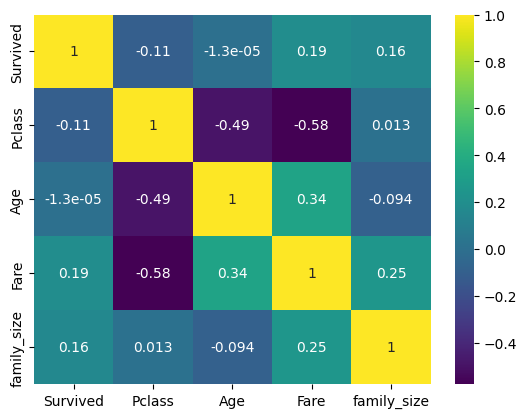

In [ ]:
corr_df = df.corr(numeric_only=True)
sns.heatmap(corr_df,cmap='viridis',annot=True)
plt.show()

Imputing missing values


In [ ]:
missing_values = df.isna().sum()
percentages = (missing_values / len(df)) * 100
result_df = pd.DataFrame({
    'no of missing values': missing_values.values,
    'percentage': percentages.round(2)  # Round percentages to two digits
}, index=df.columns)
result_df

,no of missing values,percentage
Survived,0,0.00
Pclass,0,0.00
Sex,0,0.00
Age,86,20.57
Fare,1,0.24
Cabin,327,78.23
Embarked,0,0.00
family_size,0,0.00


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(result_df, *['no of missing values'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(result_df, *['percentage'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(result_df, *['no of missing values'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(result_df, *['percentage'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(result_df, *[[['no of missing values', 'percentage']]], **{})
chart

In [ ]:
df.drop(['Cabin'],axis=1,inplace=True)


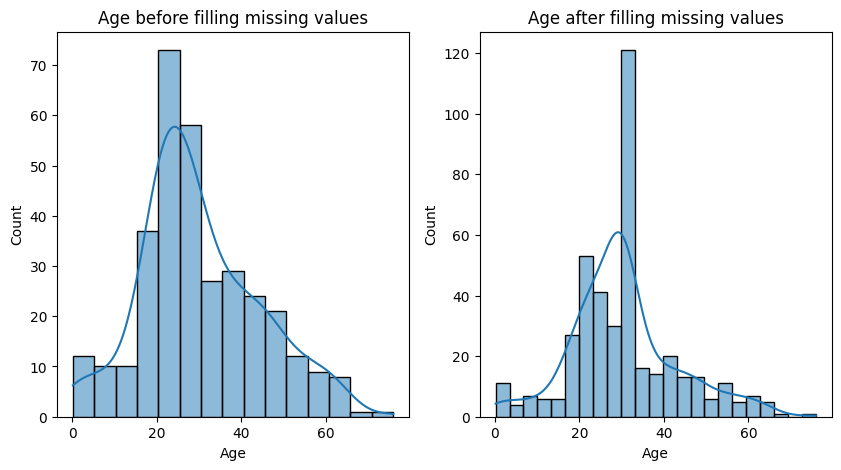

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.histplot(df['Age'],ax=ax[0],kde=True)
sns.histplot(df['Age'].fillna(df['Age'].mean()),ax=ax[1],kde=True)
ax[0].set_title('Age before filling missing values')
ax[1].set_title('Age after filling missing values')
plt.show()

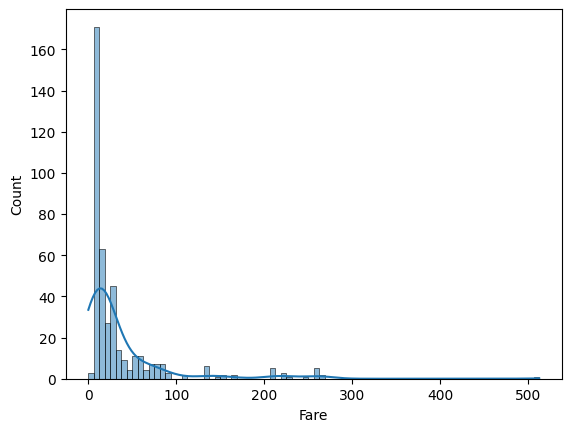

In [ ]:
sns.histplot(data=df,x='Fare',kde=True)
plt.show()

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Fare'].fillna(df['Fare'].median(),inplace=True)

In [ ]:
missing_values = df.isna().sum()
percentages = (missing_values / len(df)) * 100
result_df = pd.DataFrame({
    'no of missing values': missing_values.values,
    'percentage': percentages.round(2)  # Round percentages to two digits
}, index=df.columns)
result_df

,no of missing values,percentage
Survived,0,0.0
Pclass,0,0.0
Sex,0,0.0
Age,0,0.0
Fare,0,0.0
Embarked,0,0.0
family_size,0,0.0


import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(result_df, *['no of missing values', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(result_df, *['percentage', 'count()', None], **{})
chart

EDA

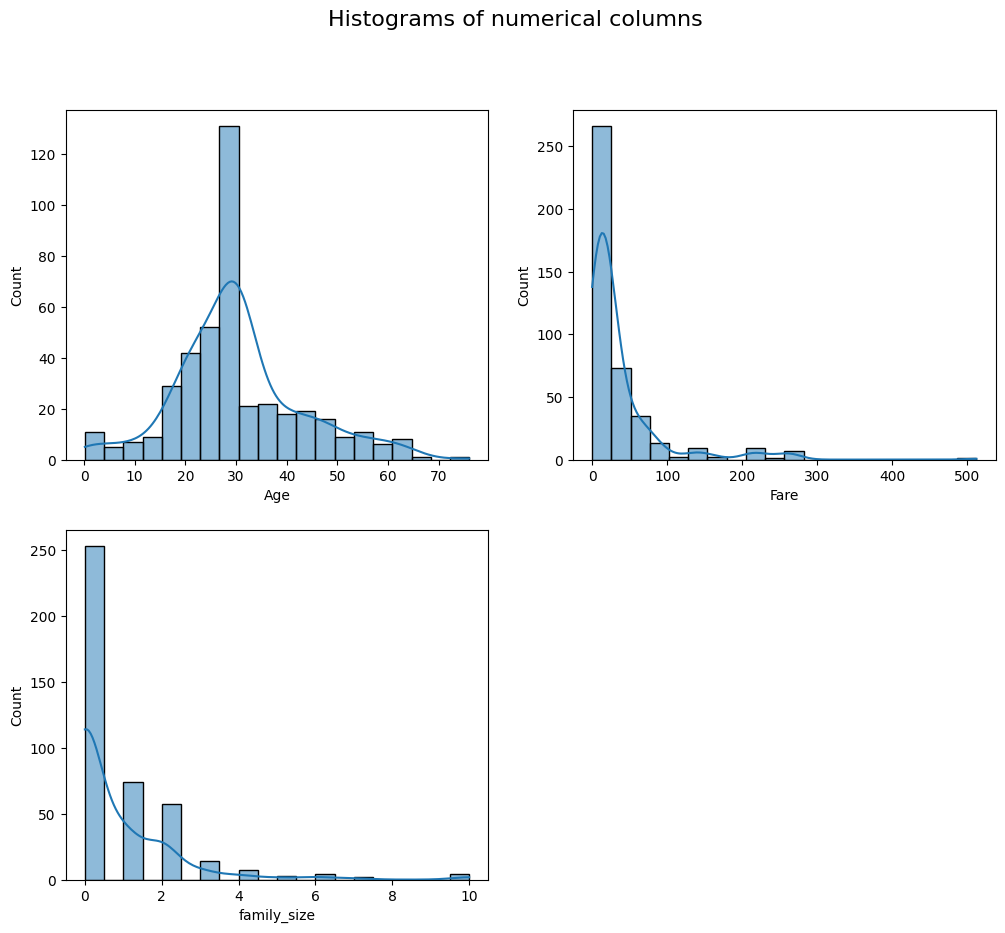

In [ ]:
num_columns=list(df.drop(['Pclass','Survived'],axis=1).select_dtypes(include=['float','int']).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num
):
        try:
            sns.histplot(data=df,x=num_columns[0],kde=True,bins=20,ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of numerical columns', fontsize=16)
plt.show()

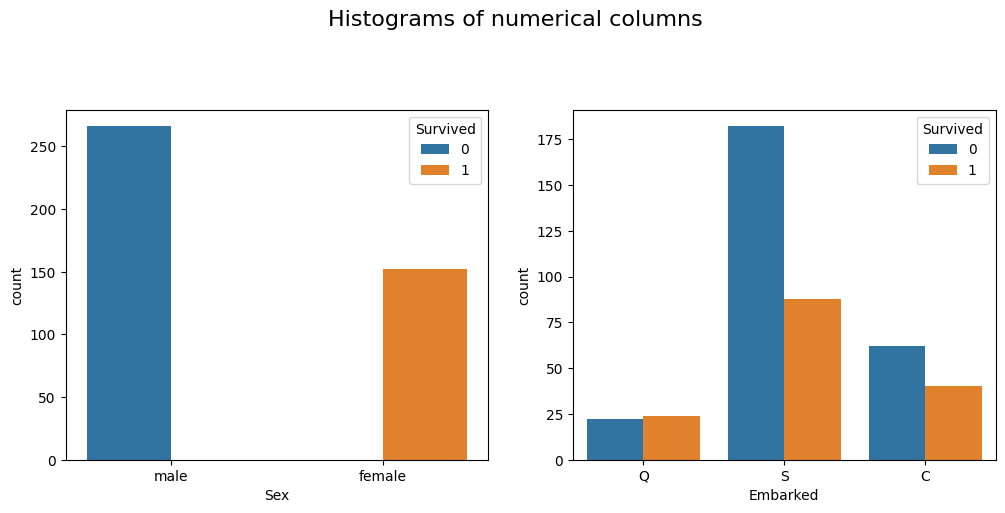

In [ ]:
cat_columns=list(df.select_dtypes(include=['object']).columns)
num=int(len(cat_columns)/2) if int(len(cat_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num
):
        try:
            sns.countplot(data=df,x=cat_columns[0],ax=ax[j][i],hue='Survived')
            cat_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of numerical columns', fontsize=16)
plt.show()

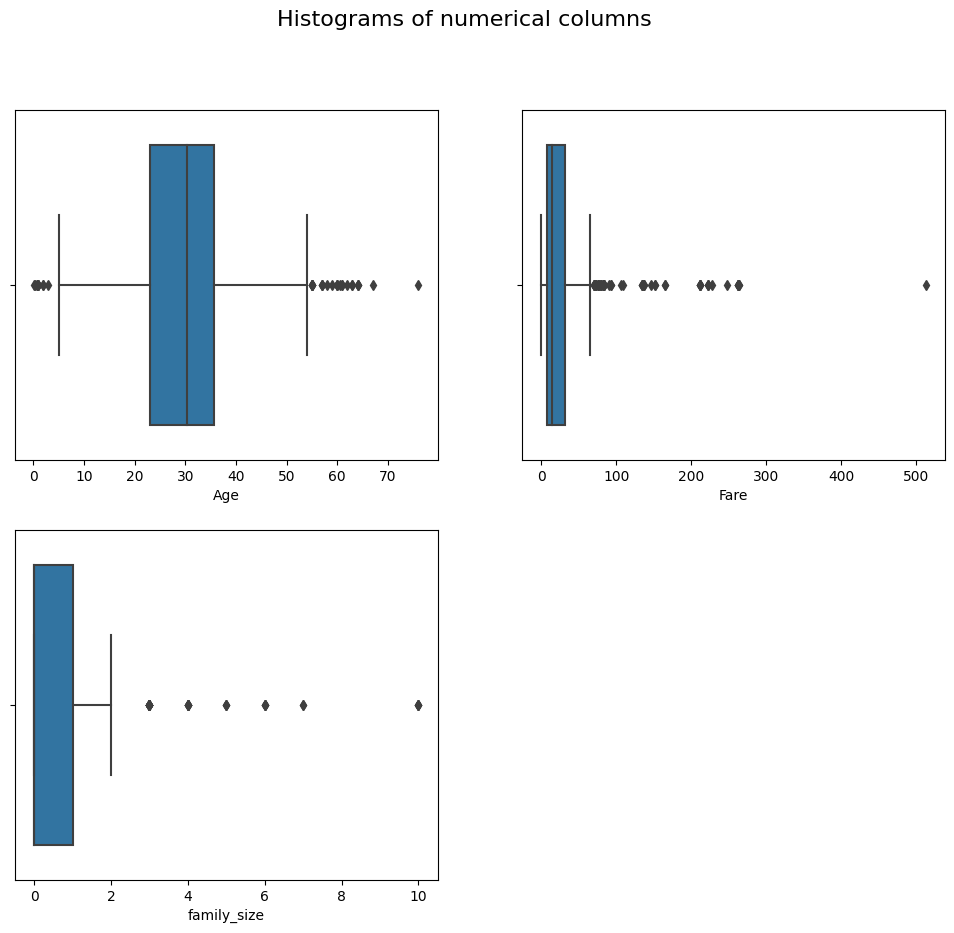

In [ ]:
num_columns=list(df.drop(['Pclass','Survived'],axis=1).select_dtypes(include=['float','int']).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num
):
        try:
            sns.boxplot(data=df,x=num_columns[0],ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of numerical columns', fontsize=16)
plt.show()

In [ ]:
ft = FunctionTransformer(np.log1p)
qt = QuantileTransformer(output_distribution='normal')
x_f = pd.DataFrame(qt.fit_transform(df[['Fare','Age','family_size']]),columns=['Fare','Age','family_size'])
x_f

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (418). n_quantiles is set to n_samples.
  warnings.warn(


,Fare,Age,family_size
0,-0.819555,0.631708,-5.199338
1,-2.097253,1.224872,0.507918
2,-0.333696,2.125161,-5.199338
3,-0.414296,-0.292657,-5.199338
4,-0.227360,-0.758016,1.047294
...,...,...,...
413,-0.511340,0.208892,-5.199338
414,1.479193,0.832236,-5.199338
415,-1.444206,0.802848,-5.199338
416,-0.511340,0.208892,-5.199338


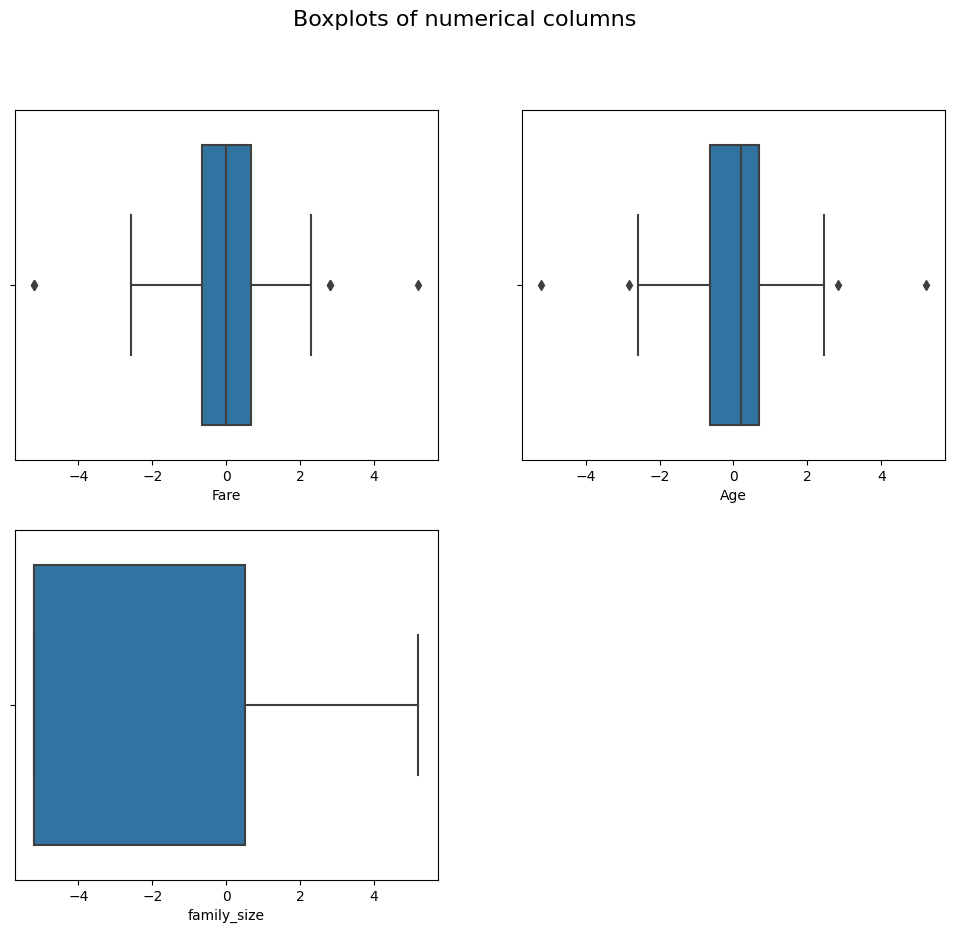

In [ ]:
num_columns=list(x_f.select_dtypes(include=['float','int']).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num):
        try:
            sns.boxplot(data=x_f,x=num_columns[0],ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Boxplots of numerical columns', fontsize=16)
plt.show()

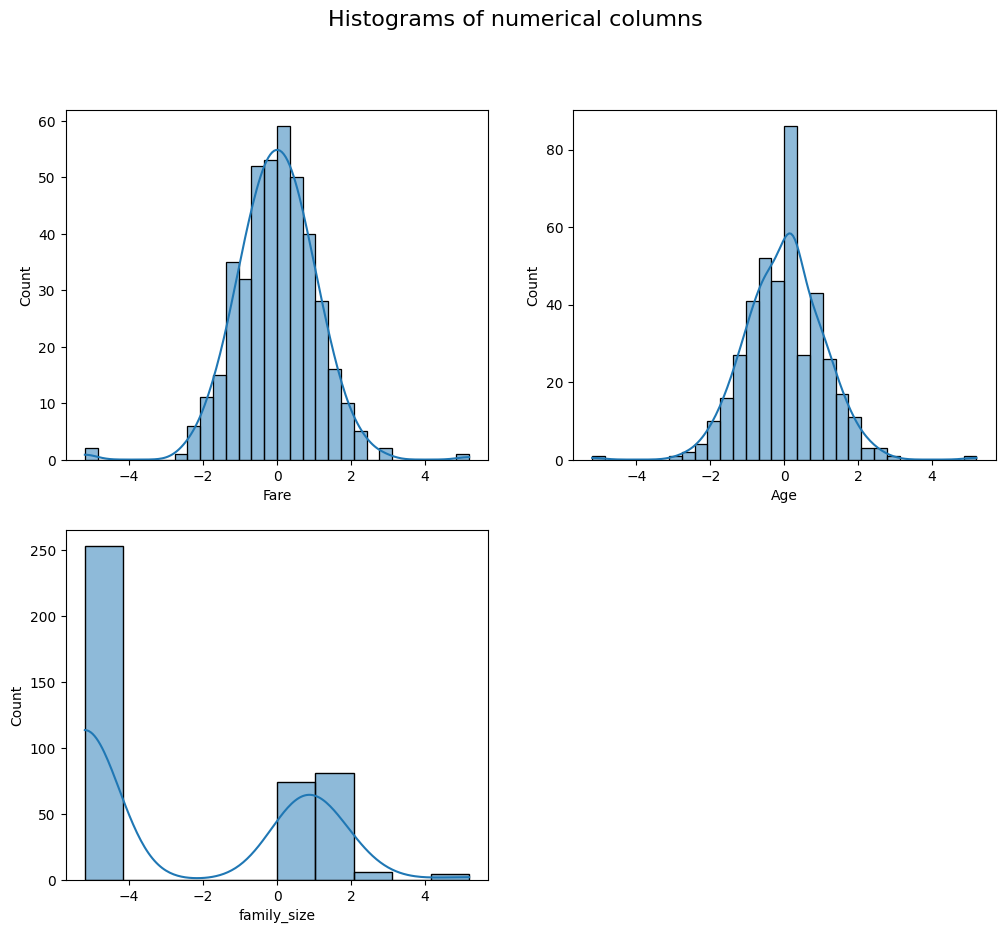

In [ ]:
num_columns=list(x_f.select_dtypes(include=['float','int']).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num):
        try:
            sns.histplot(data=x_f,x=num_columns[0],kde=True,ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of numerical columns', fontsize=16)
plt.show()

In [ ]:
df = pd.get_dummies(df,drop_first=True,dtype='int')
df.head()

,Survived,Pclass,Age,Fare,family_size,Sex_male,Embarked_Q,Embarked_S
0,0,3,34.5,7.8292,0,1,1,0
1,1,3,47.0,7.0000,1,0,0,1
2,0,2,62.0,9.6875,0,1,1,0
3,0,3,27.0,8.6625,0,1,0,1
4,1,3,22.0,12.2875,2,0,0,1


In [ ]:
qt = QuantileTransformer(output_distribution='normal')
df[['Fare','Age','family_size']] = qt.fit_transform(df[['Fare','Age','family_size']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (418). n_quantiles is set to n_samples.
  warnings.warn(


In [ ]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=42)
lg = LogisticRegression(solver='liblinear')
lg.fit(train_X,train_y)
y_pred = lg.predict(test_X)
accuracy_score(test_y,y_pred)

1.0